# Gaussian Process Emulator for the summary statistics $r(k; \theta)$

## $r(k) = P_{MG}(k) /P_{LCDM}(k)$ is the ratio of Dark matter power spectra in Modified Gravity Cosmology and $\Lambda$CDM Cosmology respectively.

### The cosmological paramters currently supported are $\theta = \{\Omega_m, n_s, \sigma_8, f_{R_0}, n\}$


In [1]:
from mgemu import emu
import numpy as np
import matplotlib.pylab as plt

### The emulator requires loading 2 trained models:
### 1. PCA decomposition 
### 2. Gaussian Process interpolation

The Sample models below are trained for $z=0.01999$. Other models will be updated soon (and a $z$ dependence in the emulator will be implemented as well)

In [10]:
mgCosmo = emu()
mgCosmo.load_models(GPmodelFile='models/GPflow_model', PCAmodelFile='models/PCA_model')

(<gpflow.models.gpr.GPR at 0x1a375209b0>,
 PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
     svd_solver='auto', tol=0.0, whiten=False))

### Sample calling the emulator for a given cosmology $\{\Omega_m, n_s, \sigma_8, f_{R_0}, n\}$

In [11]:
paraCosmos = np.array([0.14, 0.88, 0.8, 1e-6, 2]) # Test cosmology parameters
ks, rCosmo = mgCosmo.emulate(paraCosmos) # power spectra ratio

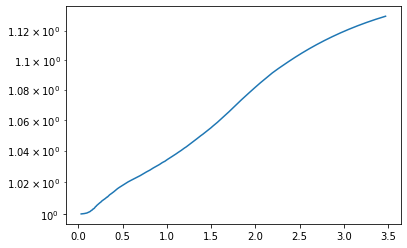

In [15]:
plt.plot(ks, rCosmo)
plt.yscale('log')

In [16]:
%timeit mgCosmo.emulate(paraCosmos) 

4.35 ms ± 77.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
